## Park_HeeJi_HW2.ipynb
- Student Name : Hee Ji Park
- Github Username : heejipark
- USC ID : 4090715830

## 1. Combined Cycle Power Plant Data Set

### Required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

### (a) Read the Combined Cycle Power Plant data

In [2]:
filepath = './../../data/CCPP/Folds5x2_pp.xlsx'
df = pd.read_excel(filepath, 'Sheet1')

### (b) Exploring the data

#### i. How many rows are in this data set? How many columns?

In [3]:
print(df)
print("The number of rows: %d"% (len(df)))
print("The number of columns: %d" % (len(df.iloc[0])))

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]
The number of rows: 9568
The number of columns: 5


#### What do the rows and columns represent?

- Answer -> The rows represent the data points collected from a Combined Cycle Power Plant over 6 years (2006-2011). The columns represent various features which consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant."

#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. 

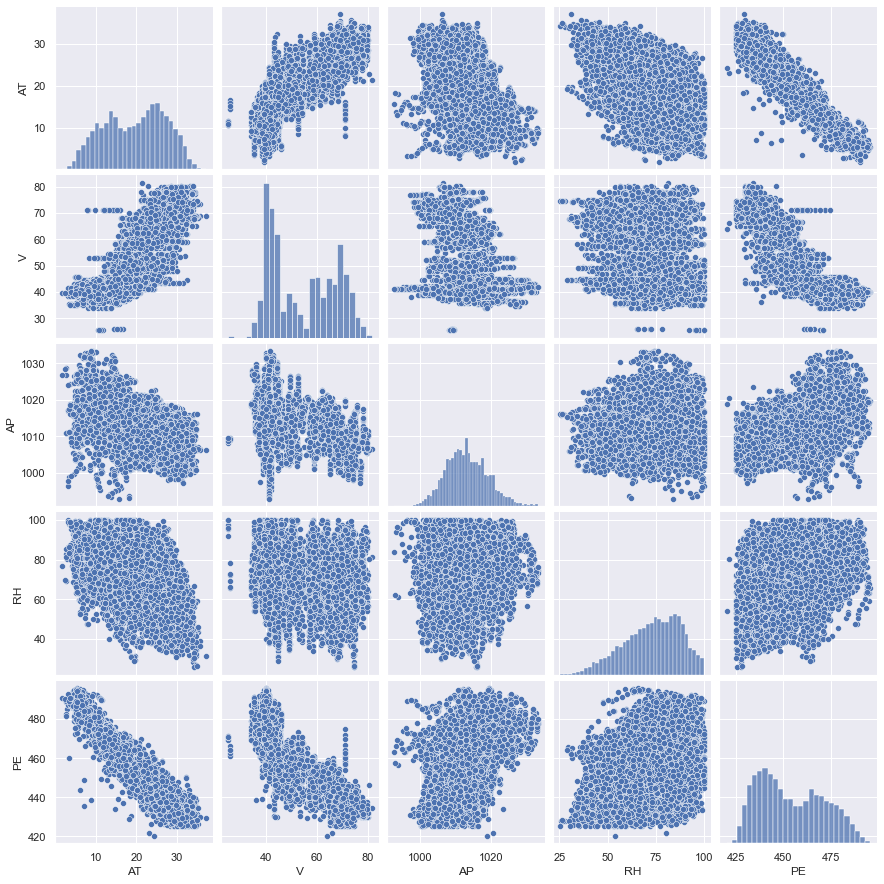

In [4]:
sns.set()
sns.pairplot(df)
plt.show()

#### ii. Describe yourfindings.

- Answer => The relationship between V and AT shows the positive correlation. Also, the relationship between PE and AT and the relationship between PE and V show the negative correlation.

#### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table

In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### (c)
#### (c-1) For each predictor, fit a simple linear regression model to predict the response.

In [6]:
X_col = ['AT','V','AP','RH']
train_Y = df['PE']
model1_coef = []
cooks_distance = []

for i, col in enumerate(X_col):
    # Using OLS()
    print("Using sm.OLS() -------------------------------------------------------------")
    print("%d. X = %s" % (i+1, col))
    train_X = sm.add_constant(df[[col]])
    model1 = sm.OLS(train_Y, train_X)
    fitted_model1 = model1.fit()
    print(fitted_model1.summary())
    print(fitted_model1.params)
    model1_coef.append(fitted_model1.params[col])
    print()
    print("\n\n")
    
    
    # In order to find outliers, using Cook's distance ------------
    np.set_printoptions(suppress=True)   # Suppress scientific notation
    influence = fitted_model1.get_influence()   # Create instance of influence
    cooks = influence.cooks_distance   # Obtain Cook's distance for each observation
    cooks_distance.append(cooks)

Using sm.OLS() -------------------------------------------------------------
1. X = AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:03   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

#### (c-2) Describe your results. In which of the models is there a statistically significant association between the predictor and the response? 

1. X = AT 
    - P > |t| : 0.000

2. X = V
    - P > |t| : 0.000

3. X = AP
    - P > |t| : 0.000
    
4. X = RH
    - P > |t| : 0.000

- Answer => As you can see from the above reports, all four relationships between the predictor and the response have the p-values close to zero. The lower the p-value, the greater the statistical significance of the observed difference. Therefore, we can say all four model are statistically significant association between the predictor and the response.

#### (c-3) Create some plots to back up your assertions. 


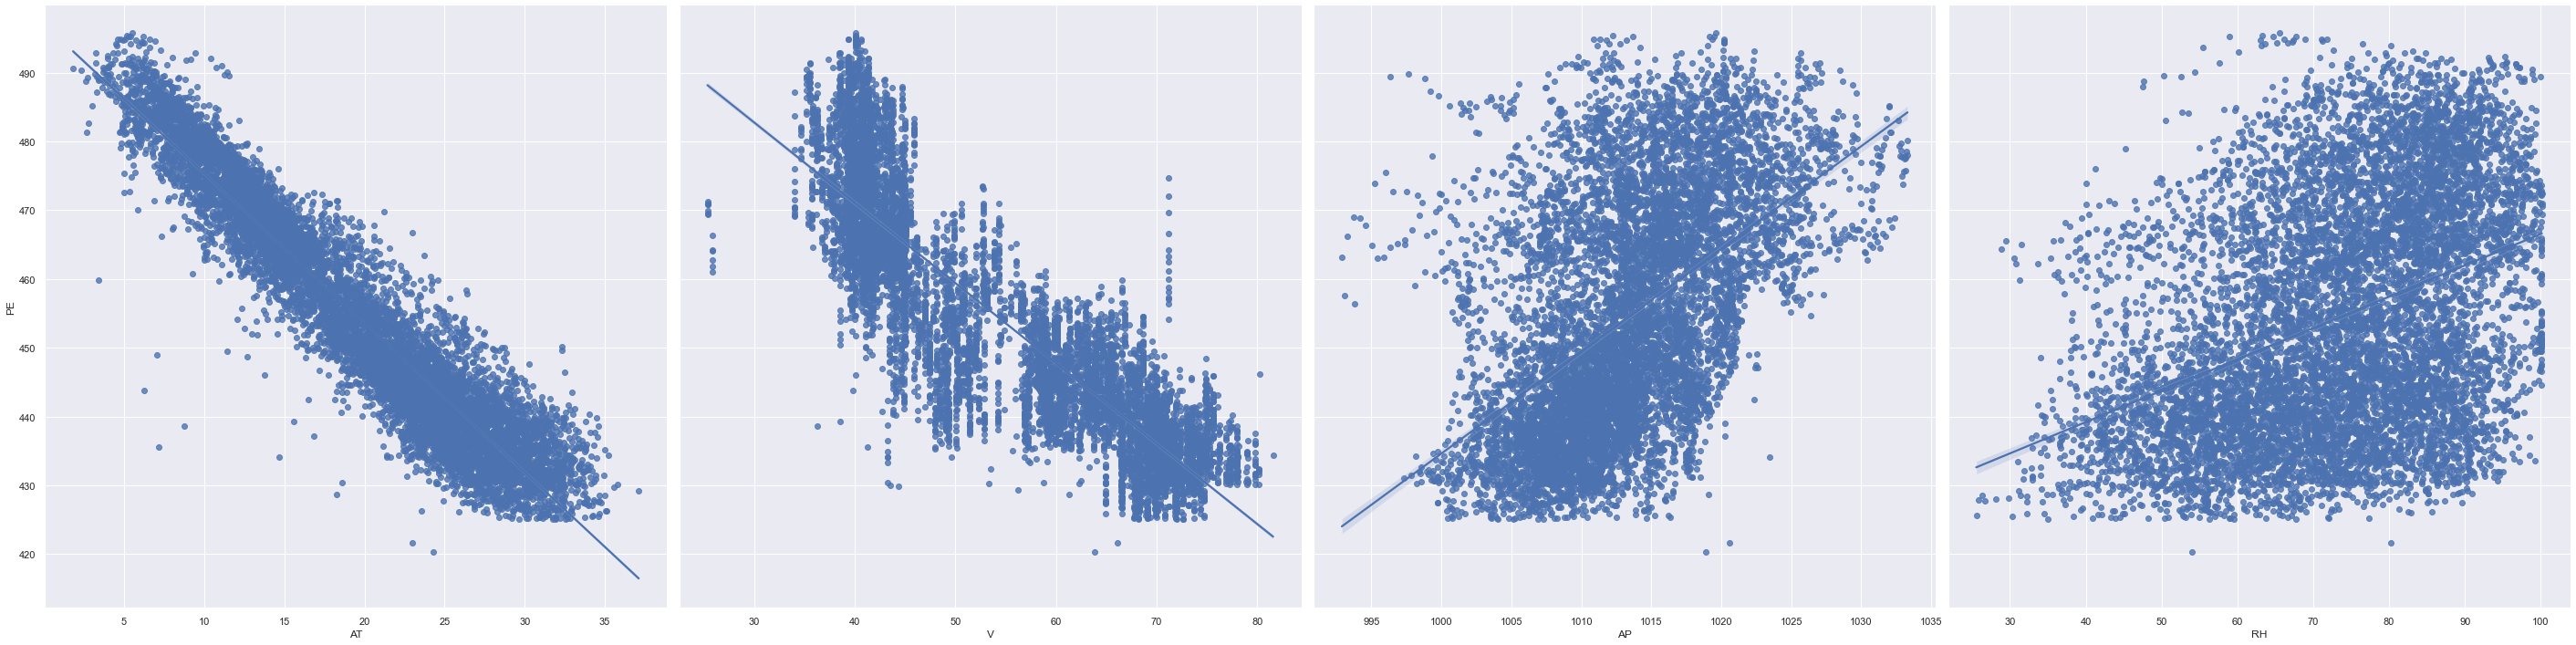

In [7]:
sns.pairplot(df, x_vars=X_col, y_vars='PE', markers="o", kind='reg', height=10)

- Answer -> As you can see the above plots, you can find significant associations between the predictor and the response.

#### (c-4) Are there any outliers that you would like to remove from your data for each of these regression tasks?

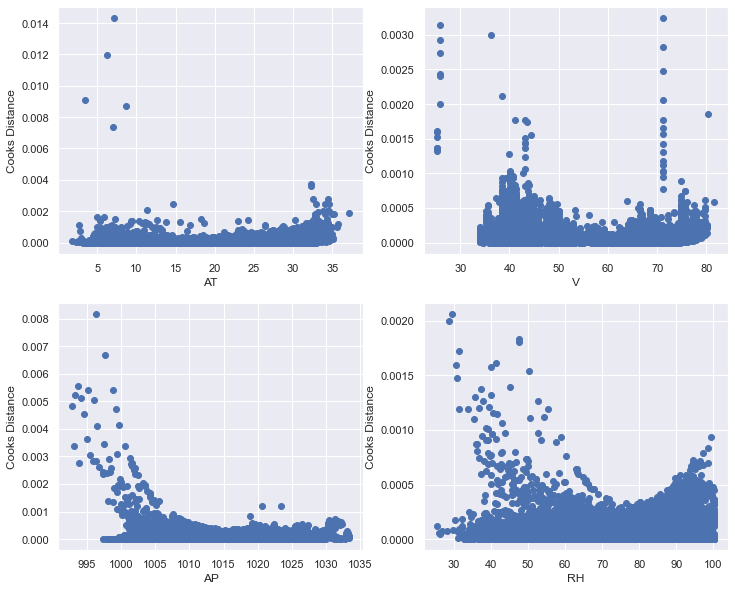

In [8]:
fig = plt.figure(figsize=(12, 10))

for idx, cook in enumerate(cooks_distance):
    
    plt.subplot(2, 2, idx+1)
    plt.scatter(df[X_col[idx]], cooks_distance[idx][0])
    plt.xlabel(X_col[idx])
    plt.ylabel('Cooks Distance')
plt.show()

- Answer -> Yes. In the above plots, we can find some outliers. (A outlier stands for a data point that differs significantly from other observations.)

### (d)
#### (d-1) Fit a multiple regression model to predict the response using all of the predictors.

In [9]:
X_col = ['AT','V','AP','RH']
train_Y = df['PE']
model2_coef = []

train_X2 = sm.add_constant(df[X_col])
model2 = sm.OLS(train_Y, train_X2).fit()
print(model2.summary())
print()
print(model2.params)
for col in X_col:
    model2_coef.append(model2.params[col])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:11   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

#### (d-2) Describe your results. For which predictors can we reject the null hypothesis H0:βj = 0?

- Answer -> Reject the null hypothesis when the p-value is less than or equal to your significance level.
Therefore, we can rejct the null hypothesis for all the predictors (AT, V, AP, RH) because all p-values are close to zero.

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis.  
That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

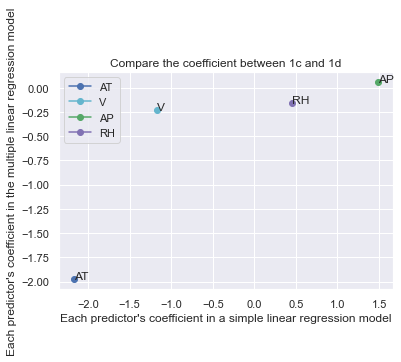

In [10]:
X_col = ['AT','V','AP','RH']
color = ['b', 'c', 'g', 'm']
i = 0

plt.title('Compare the coefficient between 1c and 1d')
for m1, m2 in zip(model1_coef, model2_coef):
    plt.plot(m1, m2, label=X_col[i], color=color[i], marker='o')
    plt.annotate(X_col[i], xy=(m1, m2))
    plt.legend()
    plt.xlabel('Each predictor\'s coefficient in a simple linear regression model')
    plt.ylabel('Each predictor\'s coefficient in the multiple linear regression model')
    i += 1
plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? 
To answer this question, for each predictor X, fit a model of the form.
<br><br>
<center> Y = β0 + β1X + β2X^2 + β3X^3 + ϵ </center>

AT


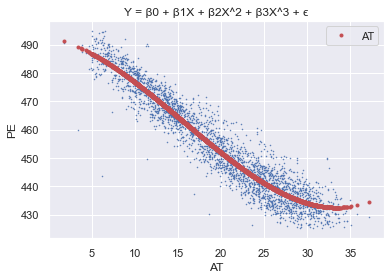

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.285e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:11   Log-Likelihood:                -20409.
No. Observations:                6698   AIC:                         4.083e+04
Df Residuals:                    6694   BIC:                         4.085e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.5560      0.795    619.942      0.0

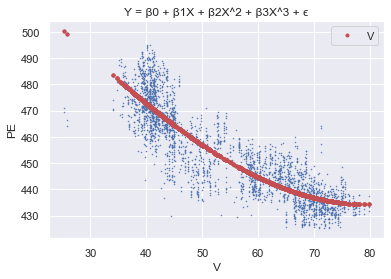

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     7777.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:11   Log-Likelihood:                -23486.
No. Observations:                6698   AIC:                         4.698e+04
Df Residuals:                    6694   BIC:                         4.701e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        553.5962     10.845     51.044      0.0

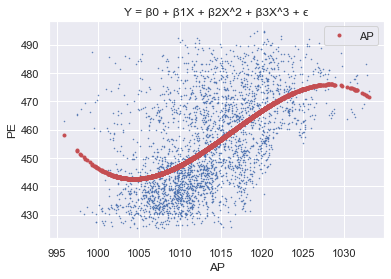

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     1239.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:12   Log-Likelihood:                -27458.
No. Observations:                6698   AIC:                         5.492e+04
Df Residuals:                    6695   BIC:                         5.494e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0782      0.010      7.494      0.0

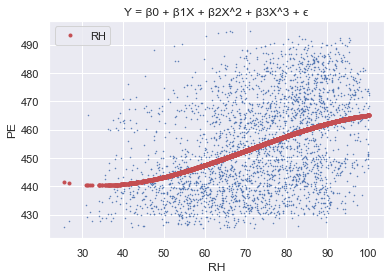

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     399.9
Date:                Fri, 23 Sep 2022   Prob (F-statistic):          6.12e-239
Time:                        23:15:12   Log-Likelihood:                -27961.
No. Observations:                6698   AIC:                         5.593e+04
Df Residuals:                    6694   BIC:                         5.596e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        462.8033     12.742     36.321      0.0

In [11]:
# Split train and test datasets
train = df.sample(frac = 0.7, random_state = 20)
test_index = [idx for idx in df.index if idx not in train.index]
test = df[df.index.isin(test_index)]
train_X, train_Y = train[X_col], train['PE']
test_X, test_Y = test[X_col], test['PE']


for i, col in enumerate(X_col):
    
    print('==================================================')
    print(col)
    print('==================================================')

    tr_X = train_X[col].values.reshape(-1,1)
    tr_Y = train_Y.values.reshape(-1,1)
    te_X = test_X[col].values.reshape(-1,1)
    te_Y = test_Y.values.reshape(-1,1)

    poly = PolynomialFeatures(degree = 3)
    model = poly.fit_transform(tr_X)
    LR = LinearRegression()
    LR.fit(model, tr_Y)
    predicted_Y = LR.predict(poly.fit_transform(te_X))

    plt.plot(te_X, te_Y, 'b.', markersize = 1)
    plt.title('Y = β0 + β1X + β2X^2 + β3X^3 + ϵ')
    plt.xlabel(col)
    plt.ylabel('PE')
    plt.plot(te_X, predicted_Y, 'r.', label=col)
    plt.legend()
    plt.show()
    
    stat_X = np.column_stack((tr_X, tr_X**2, tr_X**3))
    stat_X = sm.add_constant(stat_X)
    model2 = sm.OLS(tr_Y, stat_X).fit()
    print(model2.summary())

- Answer ->  As can be seen from the model summaries and graphs above, there is evidence of a non-linear association between predictors and responses. (* V^2 is not statistically significant.)

### (g) Is there evidence of association of interactions of predictors with the response? 
To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant

- Fully linear regression means to fit a model with all single predictors + all pairwise interaction terms.

In [12]:
interactions = pd.DataFrame(df[X_col], columns=X_col)
Y = df['PE']

for idx1, col1 in enumerate(X_col[:-1]):
    for idx2, col2 in enumerate(X_col[1:]):
        if col1 == col2: continue
        cname = col1 + '*' + col2
        interactions[cname] = df[col1] * df[col2]

interactions = sm.add_constant(interactions)
model = sm.OLS(Y, interactions).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:12   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

- Answer -> If the feature's p-value is less than 0.05, we can say the feature is statistically significant. <br> Therefore, we can say (AT\*V), (AT\*RH), (V\*AP), (AP\*V), (AP\*RH) are statistically significant interactions.

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? 
#### (h-1) Train the regression model on a randomly selected 70% subset of the data with all predictors. 

In [13]:
# Split train and test datasets
train = df.sample(frac = 0.7, random_state = 20)
test_index = [idx for idx in df.index if idx not in train.index]
test = df[df.index.isin(test_index)]
train_X, train_Y = train[X_col], train['PE']
test_X, test_Y = test[X_col], test['PE']

In [14]:
# Train the regression model with all predictors

train_X = sm.add_constant(train_X)
model = sm.OLS(train_Y, train_X).fit()
print(model.summary())
print()

train_predicted = model.predict(train_X)
train_MSE = metrics.mean_squared_error(train_Y, train_predicted)
print('- [All predictors] MSE of train data: %f \n'% train_MSE)


test_X = sm.add_constant(test_X)
test_predicted = model.predict(test_X)
test_MSE = metrics.mean_squared_error(test_Y, test_predicted)
print('- [All predictors] MSE of test data: %f \n'% test_MSE)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.150e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:12   Log-Likelihood:                -19710.
No. Observations:                6698   AIC:                         3.943e+04
Df Residuals:                    6693   BIC:                         3.946e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        458.3008     11.711     39.133      0.0

#### (h-2) Also, run a regression model involving all possible interaction terms and quadratic nonlinearities.

In [15]:
# Train the regression model with all possible interaction terms and quadratic nonlinearities
train_X, train_Y = train[X_col], train['PE']
test_X, test_Y = test[X_col], test['PE']

# For train_X
for idx1, col1 in enumerate(X_col):
    for idx2, col2 in enumerate(X_col):
        if col2 + '*' + col1 in train_X.columns:
            continue
        if col1 == col2: 
            cname = col1 + '^2'
        else:
            cname = col1 + '*' + col2
        train_X[cname] = df[col1] * df[col2]

tr_X = train_X
train_X = sm.add_constant(train_X)
model = sm.OLS(train_Y, train_X).fit()
print(model.summary())
print()

train_predicted = model.predict(train_X)
train_MSE = metrics.mean_squared_error(train_Y, train_predicted)
print('- [All possible interaction terms and quandratic nonlinearties] MSE of train data: %f \n'% train_MSE)



# For test_X
for idx1, col1 in enumerate(X_col):
    for idx2, col2 in enumerate(X_col):
        if col2 + '*' + col1 in test_X.columns:
            continue
        if col1 == col2: 
            cname = col1 + '^2'
        else:
            cname = col1 + '*' + col2
        test_X[cname] = df[col1] * df[col2]

ts_X = test_X
test_X = sm.add_constant(test_X)
test_predicted = model.predict(test_X)
test_MSE = metrics.mean_squared_error(test_Y, test_predicted)
print('- [All possible interaction terms and quandratic nonlinearties] MSE of test data: %f \n'% test_MSE)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7103.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:12   Log-Likelihood:                -19252.
No. Observations:                6698   AIC:                         3.853e+04
Df Residuals:                    6683   BIC:                         3.864e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6895.6026   1433.207     -4.811      0.0

- Answer -> inginificant variables = V, AT\*AP, V^2, V\*AP, V\*RH
- AT should be kept because AT^2 is signinficant

#### (h-3) Remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

- Remove AT\*AP, V\*AP, V\*RH, V^2

In [16]:
tr_X = tr_X.drop(columns=['AT*AP', 'V*AP', 'V*RH', 'V^2'])

tr_X = sm.add_constant(tr_X)
model = sm.OLS(train_Y, tr_X).fit()
print(model.summary())
print()

tr_predicted = model.predict(tr_X)
tr_MSE = metrics.mean_squared_error(train_Y, tr_predicted)
print('- [After removing insignificnat variables] MSE of train data: %f \n'% tr_MSE)

ts_X = ts_X.drop(columns=['AT*AP', 'V*AP', 'V*RH', 'V^2'])

ts_X = sm.add_constant(ts_X)
ts_predicted = model.predict(ts_X)
ts_MSE = metrics.mean_squared_error(test_Y, ts_predicted)
print('- [After removing insignificnat variables] MSE of test data: %f \n'% ts_MSE)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     9929.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:12   Log-Likelihood:                -19259.
No. Observations:                6698   AIC:                         3.854e+04
Df Residuals:                    6687   BIC:                         3.862e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9896.4670   1084.035     -9.129      0.0

##### Report

1. First model
    - [All predictors] MSE of train data: 21.064456 
    - [All predictors] MSE of test data: 20.083896 


2. Second model
    - [All possible interaction terms and quandratic nonlinearties] MSE of train data: 18.371527 
    - [All possible interaction terms and quandratic nonlinearties] MSE of test data: 17.500202 


3. Third model
    - [After removing insignificnat variables] MSE of train data: 18.409416 
    - [After removing insignificnat variables] MSE of test data: 17.534160 


### (i) KNN Regression

#### Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, ..., 100} that gives you the best fit and plot the train and test errors in terms of 1/k.

In [17]:
# Train set : 70% of total data
# raw train data
train = df.sample(frac = 0.7, random_state = 20)
train_X = train[X_col]
train_Y = train[['PE']]

# normalized train data
normalizer = preprocessing.Normalizer().fit(train)
train_norm = normalizer.transform(train)
train_norm = pd.DataFrame(train_norm, columns=['AT', 'V', 'AP', 'RH','PE'])
train_X_norm = train_norm[X_col]
train_Y_norm = train_norm[['PE']]

In [18]:
# Test set: 30% of total data
test_idx = [idx for idx in df.index if idx not in train_X.index]

# raw test data
test = df[df.index.isin(test_idx)]
test_X = test[X_col]
test_Y = test[['PE']]

# normalized test data
normalizer = preprocessing.Normalizer().fit(test)
test_norm = normalizer.transform(test)
test_norm = pd.DataFrame(test_norm, columns=['AT', 'V', 'AP', 'RH','PE'])
test_X_norm = test_norm[X_col]
test_Y_norm = test_norm[['PE']]

1. Perform k-neaarest neighbor regression with raw features.



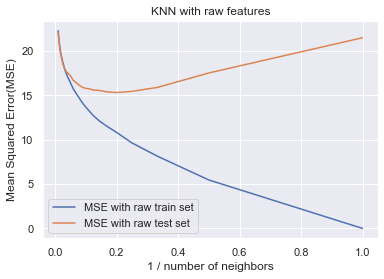

If we use raw features, k = 5 is the best value for k-nearest with test data and its error = 15.304360 


2. Perform k-neaarest neighbor regression with nomalized features.



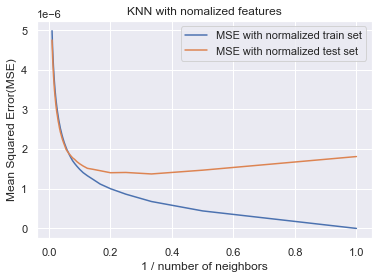

If we use normalized features, k = 3 is the best value for k-nearest with test data and its error = 0.000001


In [19]:
# Perform k-neaarest neighbor regression with raw features
Ntrain = len(train_X)
Ntest = len(test_X)
kArray = np.arange(1,101)
train_minError, train_minK = float('inf'), 0
test_minError, test_minK = float('inf'), 0
trainError = []
testError = []

print('1. Perform k-neaarest neighbor regression with raw features.\n')
for k in kArray:
    knn = KNeighborsRegressor(n_neighbors=k, p = 2)  
    knn.fit(train_X, train_Y)
    
    # Calculate train --------------------------------------
    predicted_train = knn.predict(train_X)
    kError_train = metrics.mean_squared_error(predicted_train, train_Y)
    trainError.append(kError_train)
    if train_minError > kError_train and k > 1:
        train_minError = kError_train
        train_minK = k
    
    # Calculate test ---------------------------------------
    predicted_test = knn.predict(test_X)
    kError_test = metrics.mean_squared_error(predicted_test, test_Y)
    testError.append(kError_test)
    if test_minError > kError_test and k > 1:
        test_minError = kError_test
        test_minK = k


plt.title('KNN with raw features')
plt.plot(1 / kArray, trainError, label='MSE with raw train set')
plt.plot(1 / kArray, testError, label='MSE with raw test set')
plt.legend()
plt.xlabel('1 / number of neighbors')
plt.ylabel('Mean Squared Error(MSE)')
plt.show()

print("If we use raw features, k = %d is the best value for k-nearest with test data and its error = %f \n\n" % (test_minK, test_minError))


##############################################################################################################
# Perform k-neaarest neighbor regression with nomalized features
Ntrain = len(train_X_norm)
Ntest = len(test_X_norm)
kArray = np.arange(1,101)
train_norm_minError, train_norm_minK = float('inf'), 0
test_norm_minError, test_norm_minK = float('inf'), 0
trainError_norm = []
testError_norm = []

print('2. Perform k-neaarest neighbor regression with nomalized features.\n')
for k in kArray:
    knn = KNeighborsRegressor(n_neighbors=k, p = 2)  
    knn.fit(train_X_norm, train_Y_norm)
    
    # Calculate train --------------------------------------
    predicted_train = knn.predict(train_X_norm)
    kError_train = metrics.mean_squared_error(predicted_train, train_Y_norm)
    trainError_norm.append(kError_train)
    if train_norm_minError > kError_train and k > 1:
        train_norm_minError = kError_train
        train_norm_minK = k
    
    # Calculate test ---------------------------------------
    predicted_test = knn.predict(test_X_norm)
    kError_test = metrics.mean_squared_error(predicted_test, test_Y_norm)
    testError_norm.append(kError_test)
    if test_norm_minError > kError_test and k > 1:
        test_norm_minError = kError_test
        test_norm_minK = k


plt.title('KNN with nomalized features')
plt.plot(1 / kArray, trainError_norm, label='MSE with normalized train set')
plt.plot(1 / kArray, testError_norm, label='MSE with normalized test set')
plt.legend()
plt.xlabel('1 / number of neighbors')
plt.ylabel('Mean Squared Error(MSE)')
plt.show()

print("If we use normalized features, k = %d is the best value for k-nearest with test data and its error = %f" % (test_norm_minK, test_norm_minError))

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis

- Answer -> <br> When comparing the results of KNN Regression with the linear regression model that has the smallest test error, we can figure out that KNN has better performance. According to the ISLR, any parametric approach, including linear regression, brings with it the possibility that the functional form used to estimate f is different from the true f, which leads that model will not fit the data. On the other hands, non-parametric approaches like KNN can avoid this danger, since essentially no assumption about the form of f is made.

<hr>

## 2. ISLR: 2.4.1

<img src='./../../data/ISLR-img/ISLR-2-4-1.jpg' />

<hr>

## 3. ISLR: 2.4.7

<img src='./../../data/ISLR-img/ISLR-2-4-7.jpg' />

### Note that

- Since this repository is private, image files for ISLR questions in Park_HeeJi_HW02.ipynb may not appear in github preview. Therefore, the answers to ISLR can be found in "data > ISLR-img" folder. (Click data > ISLR-img > you can find two image files.)

## References

1. Cook's distance : https://www.statology.org/cooks-distance-python/
2. Polynomial regression : https://medium.com/analytics-vidhya/polynomial-regression-in-python-4a7c60e8c902, https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features